# 포켓몬 데이터 EDA
**Reference: https://www.kaggle.com/datasets/abcsds/pokemon?resource=download**

목표 : 이진변수 'Legendary'를 예측하기 위한 feature engineering

## 1. 데이터 로드
- 포켓몬 데이터셋을 `pokemon.csv`에서 로드하여 `df_raw` 데이터프레임 생성.

## 2. 데이터 정보 확인
- 데이터의 기본 정보 및 결측치 확인.
- `Type 2`의 결측치 존재 확인.

## 3. 결측치 처리
- `Type 2` 결측치를 'None'으로 대체.
- `have2types` 변수 추가: 포켓몬이 두 개의 타입을 가지고 있는지 여부.

## 4. 데이터 시각화
- 포켓몬 스탯에 대한 산점도 생성.
- 전설 포켓몬과 일반 포켓몬의 스탯 비교.

## 5. 이름 길이 분석
- 포켓몬 이름의 길이를 기반으로 새로운 변수 `LengthOfName` 추가.
- 이름 길이에 따른 전설 포켓몬과 일반 포켓몬의 분포 시각화.

## 6. 이름 토큰화
- 포켓몬 이름을 토큰화하여 전설 포켓몬과 일반 포켓몬의 이름 구성 요소 분석.

## 7. 원-핫 인코딩
- `Type 2`에 대한 원-핫 인코딩 수행.
- 불필요한 열 제거 후 최종 데이터셋 생성.

## 8. 데이터 저장
- 전처리된 데이터셋을 `pokemon_preprocessed.csv`로 저장.


## Set up

In [1]:
# 데이터 컨트롤
import numpy as np
import pandas as pd
import re

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('./data/pokemon.csv')

df_raw.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df_raw.info() 

# Type2 결측치 존재 -> 확인 후 제거
# 범주형 변수 존재 -> 인코딩

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
pokemon = df_raw.copy()

## EDA

In [5]:
pokemon.isnull().sum()


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
pokemon[pokemon['Type 2'].isnull()] # 타입이 하나 밖에 없는 경우 Type 2가 결측값을 갖는 것으로 보임

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [7]:
pokemon['have2types'] = pokemon['Type 2'].apply(lambda x : isinstance(x, str)) # 타입이 두개인지 아닌지 -> 변수 추가

In [8]:
pokemon.groupby(['Legendary', 'have2types']).size().unstack().apply(lambda x: round(x/x.sum(), 2), axis=1)

# 전설 포켓몬은 타입을 2개 갖고 있는 경우가 일반 포켓몬에 비해 비중이 높다.

have2types,False,True
Legendary,,
False,0.49,0.51
True,0.38,0.62


In [9]:
pokemon['Type 2'] = pokemon['Type 2'].fillna('None') # 결측치 None으로 대체

In [10]:
pokemon.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
have2types    0
dtype: int64

In [11]:
stats = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']

In [12]:
pokemon_stats = pokemon[stats]
pokemon_stats = pd.concat([pokemon_stats, pd.DataFrame(pokemon['Legendary'])], axis=1)

In [13]:
pokemon_stats

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,True
796,700,50,160,110,160,110,110,True
797,600,80,110,60,150,130,70,True
798,680,80,160,60,170,130,80,True


In [14]:
import plotly.subplots as sp  # subplot 모듈 추가
import plotly.graph_objects as go

# 서브플롯 생성
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=pokemon_stats.columns[1:-1])  # 3x2 서브플롯

for i, stat in enumerate(pokemon_stats.columns[1:-1]):
    row = i // 2 + 1  # 행 계산
    col = i % 2 + 1   # 열 계산
    # Legendary에 따라 색상 지정
    fig.add_scatter(x=pokemon['Total'], y=pokemon[f"{stat}"], mode='markers', 
                     name=stat, 
                     marker=dict(color=pokemon['Legendary'].map({True: 'red', False: 'blue'})), 
                     row=row, col=col, text=pokemon['Name'])  # name 추가

fig.update_layout(title='포켓몬 스탯 산점도', xaxis_title='Total', yaxis_title='Stat',
                  width=1000, height=800)  # 레이아웃 업데이트
fig.show()

# 전설 포켓몬은 Total 값이 580 이상이다. -> 분류 모델에 아주 좋은 feature로 생각됨.

In [15]:
pokemon.loc[pokemon['Legendary']==True, 'Total'].value_counts() # 9개의 값만 갖는다. 그리고 가장 작은 값은 580이다.

Total
580    19
600    18
680    13
700     5
780     3
670     3
770     2
720     1
660     1
Name: count, dtype: int64

In [16]:
len(pokemon[(pokemon.Total >= 580) & (pokemon.Legendary==False)]) / len(pokemon[pokemon.Legendary==False]) * 100 

# 일반 포켓몬 중 Total 값이 580 이상인 경우는 단 6.53%에 불과했다. --> 이진 분류를 매우 쉽게 만들어 줄 수 있는 특성으로 보임.

6.530612244897959

In [17]:
pokemon['LengthOfName'] = pokemon['Name'].apply(lambda x : len(x)) # 이름 길이 변수 추가

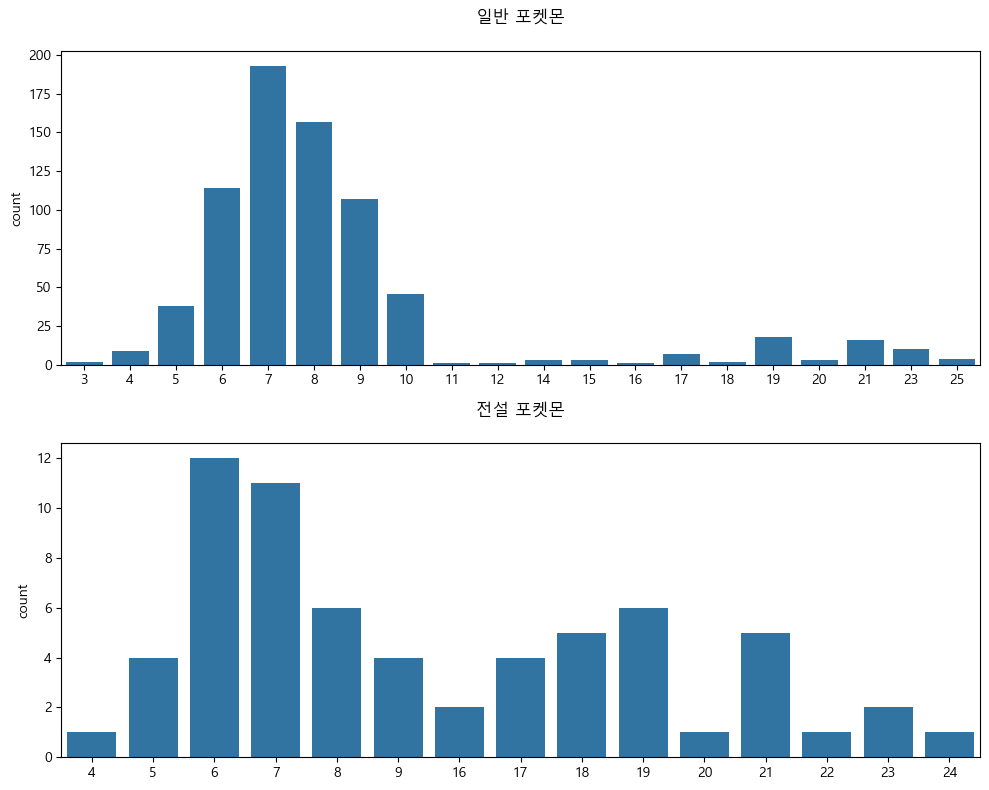

In [18]:
import preparation as prep

prep.hangul()

plt.figure(figsize=(10, 8))  # figsize 설정으로 그래프 크기 조정

plt.subplot(2, 1, 1)
sns.countplot(data=pokemon[pokemon.Legendary == False], x = 'LengthOfName').set_xlabel('')
plt.title('일반 포켓몬', pad=20)  # pad 설정으로 제목과 그래프 간격 조정

plt.subplot(2, 1, 2)
sns.countplot(data=pokemon[pokemon.Legendary == True], x = 'LengthOfName').set_xlabel('')
plt.title('전설 포켓몬', pad=20)  # pad 설정으로 제목과 그래프 간격 조정

plt.tight_layout()  # 레이아웃 조정으로 제목이 가려지지 않도록 설정
plt.show()


# 전설의 포켓몬은 이름이 긴 경우가 많다. 10보다 큰 경우가 많다.

In [19]:
 pokemon['isOver10'] = pokemon['LengthOfName'] > 10 # 이름이 10보다 긴지 아닌지 --> 변수 추가

In [20]:
pokemon[['Legendary', 'isOver10', '#']].groupby(['Legendary', 'isOver10']).count()


#
Legendary isOver10     
False     False     666
          True       69
True      False      38
          True       27

In [21]:
import re

def tokenizer(
        name: str
        )->list:
    tokens = []
    for part_name in name.split(' '):
        values = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(values)

    return tokens

In [22]:
from collections import Counter

legendary = pokemon[pokemon['Legendary']==True]

legendary_tokens = []
for name in legendary['Name']:
    legendary_tokens.extend(tokenizer(name))

Counter(legendary_tokens)

Counter({'Forme': 15,
         'Mega': 6,
         'Mewtwo': 5,
         'Kyurem': 5,
         'Deoxys': 4,
         'Hoopa': 4,
         'Latias': 3,
         'Latios': 3,
         'Kyogre': 3,
         'Groudon': 3,
         'Rayquaza': 3,
         'Incarnate': 3,
         'Therian': 3,
         'Diancie': 3,
         'Primal': 2,
         'Giratina': 2,
         'Shaymin': 2,
         'Tornadus': 2,
         'Thundurus': 2,
         'Landorus': 2,
         'Articuno': 1,
         'Zapdos': 1,
         'Moltres': 1,
         'X': 1,
         'Y': 1,
         'Raikou': 1,
         'Entei': 1,
         'Suicune': 1,
         'Lugia': 1,
         'Ho': 1,
         'Regirock': 1,
         'Regice': 1,
         'Registeel': 1,
         'Jirachi': 1,
         'Normal': 1,
         'Attack': 1,
         'Defense': 1,
         'Speed': 1,
         'Uxie': 1,
         'Mesprit': 1,
         'Azelf': 1,
         'Dialga': 1,
         'Palkia': 1,
         'Heatran': 1,
         'Regigigas': 1,

In [23]:
ordinary = pokemon[pokemon['Legendary']==False]

ordinary_tokens = []
for name in ordinary['Name']:
    ordinary_tokens.extend(tokenizer(name))

Counter(ordinary_tokens) # Mega나 Forme은 전설 포켓몬의 고유한 명칭은 아니었다. 
                         # 그리고, 이름에 특정 단어가 들어간 것으로 분류 기준을 삼는 것은 일반화 성능에 나쁜 영향을 미칠 것이라고 생각한다. (고려 하지 않음.)
                         


Counter({'Mega': 42,
         'Rotom': 11,
         'Size': 8,
         'Forme': 6,
         'Charizard': 5,
         'Pumpkaboo': 4,
         'Gourgeist': 4,
         'Venusaur': 3,
         'Blastoise': 3,
         'Beedrill': 3,
         'Pidgeot': 3,
         'Alakazam': 3,
         'Slowbro': 3,
         'Gengar': 3,
         'Kangaskhan': 3,
         'Pinsir': 3,
         'Gyarados': 3,
         'Porygon': 3,
         'Aerodactyl': 3,
         'Ampharos': 3,
         'Steelix': 3,
         'Scizor': 3,
         'Heracross': 3,
         'Houndoom': 3,
         'Tyranitar': 3,
         'Sceptile': 3,
         'Blaziken': 3,
         'Swampert': 3,
         'Gardevoir': 3,
         'Sableye': 3,
         'Mawile': 3,
         'Aggron': 3,
         'Medicham': 3,
         'Manectric': 3,
         'Sharpedo': 3,
         'Camerupt': 3,
         'Altaria': 3,
         'Banette': 3,
         'Absol': 3,
         'Glalie': 3,
         'Salamence': 3,
         'Metagross': 3,
         'Wo

In [24]:
pokemon['Type 1'].value_counts() # 이 정도 갯수면 one hot encoding으로 해도 괜찮을 것 같다.

pokemon = pd.concat([pokemon, pd.get_dummies(pokemon['Type 2'])], axis=1)

In [25]:
 dataset= pokemon.drop(['#', 'Name', 'Type 1', 'Type 2'], axis=1)

In [26]:
dataset.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'have2types', 'LengthOfName', 'isOver10',
       'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'None', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

## 데이터셋 저장

In [27]:
dataset.to_csv('pokemon_preprocessed.csv', index=False)